In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore", category=UserWarning)


In [38]:
# Colors to show wins vs losses.
color_mapping = {"W":"seagreen",
                 "L":"#C8102E"}

In [39]:
playsData = pd.read_csv('../OnlyClippersPlays.csv')
gamesData = pd.read_csv('../ClippersSchedule2425.csv')

In [40]:
playsData['PLAYED_TIME'] = pd.to_timedelta(playsData['PLAYED_TIME']).dt.total_seconds()
playsData.head()

,Unnamed: 0.1,Unnamed: 0,GAME_ID,EVENTMSGTYPE,PERIOD,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PLAYED_TIME,LAC_SCORE
0,1,21,22401036,1,1,9:58,Zubac Putback Dunk (2 PTS),NaN,NaN,2 - 2,TIE,122.0,2
1,3,23,22401036,1,1,9:30,Zubac 3' Driving Reverse Layup (4 PTS),NaN,NaN,4 - 4,TIE,150.0,4
2,5,33,22401036,1,1,7:55,Zubac 7' Driving Hook Shot (6 PTS) (Harden 1 AST),NaN,NaN,7 - 6,-1,245.0,6
3,7,35,22401036,1,1,7:16,Dunn 8' Driving Floating Jump Shot (2 PTS) (Ha...,NaN,NaN,9 - 8,-1,284.0,8
4,9,40,22401036,1,1,6:26,Dunn 10' Driving Floating Jump Shot (4 PTS) (L...,NaN,NaN,12 - 10,-2,334.0,10


In [41]:
gamesData = gamesData.sort_values('GAME_DATE')
wins = 0
losses = 0
winsList = []
lossesList = []
pct = []
for i in range(len(gamesData)):
    if gamesData.iloc[i]['WL'] == "W": wins+=1
    else: losses+=1
    winsList.append(wins)
    lossesList.append(losses)
    pct.append(wins/(wins+losses))
gamesData['WINS'] = winsList
gamesData['LOSSES'] = lossesList
gamesData['PCT'] = pct
gamesData['GAME_DATE'] = pd.to_datetime(gamesData['GAME_DATE'])
gamesData['GAME_MONTH'] = gamesData['GAME_DATE'].dt.month

month_colors = ['red','green','blue','orange','pink','black','yellow','yellow','yellow','pink','black','grey']
gamesData['MONTH_COLOR'] = gamesData['GAME_MONTH'].apply(lambda x:month_colors[x-1])
gamesData['GAME_COLOR'] = gamesData['WL'].map(color_mapping)
gamesData

,Unnamed: 0,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,OPP_TEAM_ABBREVIATION,LAC_PTS,OPP_PTS,PLUS_MINUS,HA,WINS,LOSSES,PCT,GAME_MONTH,MONTH_COLOR,GAME_COLOR
70,70,1610612746,LAC,LA Clippers,22400071,2024-10-23,LAC vs. PHX,L,PHX,113,116,-3.0,H,0,1,0.000000,10,pink,#C8102E
69,69,1610612746,LAC,LA Clippers,22400087,2024-10-26,LAC @ DEN,W,DEN,109,104,5.0,A,1,1,0.500000,10,pink,seagreen
68,68,1610612746,LAC,LA Clippers,22400101,2024-10-27,LAC @ GSW,W,GSW,112,104,8.0,A,2,1,0.666667,10,pink,seagreen
67,67,1610612746,LAC,LA Clippers,22400127,2024-10-30,LAC vs. POR,L,POR,105,106,-1.0,H,2,2,0.500000,10,pink,#C8102E
66,66,1610612746,LAC,LA Clippers,22400131,2024-10-31,LAC vs. PHX,L,PHX,119,125,-6.0,H,2,3,0.400000,10,pink,#C8102E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,1610612746,LAC,LA Clippers,22400960,2025-03-14,LAC @ ATL,W,ATL,121,98,23.0,A,37,30,0.552239,3,blue,seagreen
3,3,1610612746,LAC,LA Clippers,22400538,2025-03-16,LAC vs. CHA,W,CHA,123,88,35.0,H,38,30,0.558824,3,blue,seagreen
2,2,1610612746,LAC,LA Clippers,22400997,2025-03-18,LAC vs. CLE,W,CLE,132,119,13.0,H,39,30,0.565217,3,blue,seagreen
1,1,1610612746,LAC,LA Clippers,22401023,2025-03-21,LAC vs. MEM,W,MEM,128,108,20.0,H,40,30,0.571429,3,blue,seagreen


# 1. History of PCT Win during the Season

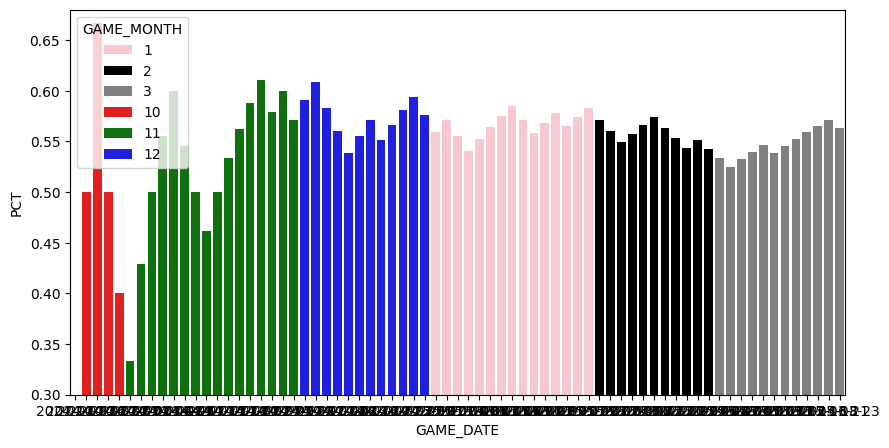

In [42]:
plt.figure(figsize=(10, 5))

sns.barplot(x="GAME_DATE",y="PCT",hue="GAME_MONTH",data=gamesData, palette=gamesData['MONTH_COLOR'].unique(), legend=True)

plt.ylim(0.3,0.68)
plt.show()

# 2. Points Scored (Wins vs Losses)

In [43]:
playsData

,Unnamed: 0.1,Unnamed: 0,GAME_ID,EVENTMSGTYPE,PERIOD,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PLAYED_TIME,LAC_SCORE
0,1,21,22401036,1,1,9:58,Zubac Putback Dunk (2 PTS),NaN,NaN,2 - 2,TIE,122.0,2
1,3,23,22401036,1,1,9:30,Zubac 3' Driving Reverse Layup (4 PTS),NaN,NaN,4 - 4,TIE,150.0,4
2,5,33,22401036,1,1,7:55,Zubac 7' Driving Hook Shot (6 PTS) (Harden 1 AST),NaN,NaN,7 - 6,-1,245.0,6
3,7,35,22401036,1,1,7:16,Dunn 8' Driving Floating Jump Shot (2 PTS) (Ha...,NaN,NaN,9 - 8,-1,284.0,8
4,9,40,22401036,1,1,6:26,Dunn 10' Driving Floating Jump Shot (4 PTS) (L...,NaN,NaN,12 - 10,-2,334.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,8785,497,22400071,3,5,2:29,Zubac Free Throw 1 of 2 (20 PTS),NaN,NaN,110 - 107,-3,3031.0,107
4144,8786,498,22400071,3,5,2:29,Zubac Free Throw 2 of 2 (21 PTS),NaN,NaN,110 - 108,-2,3031.0,108
4145,8789,507,22400071,1,5,1:40,Jones Jr. 2' Running Finger Roll Layup (12 PTS...,NaN,NaN,112 - 110,-2,3080.0,110
4146,8792,513,22400071,1,5,1:16,Powell 1' Driving Layup (17 PTS),NaN,NaN,114 - 112,-2,3104.0,112


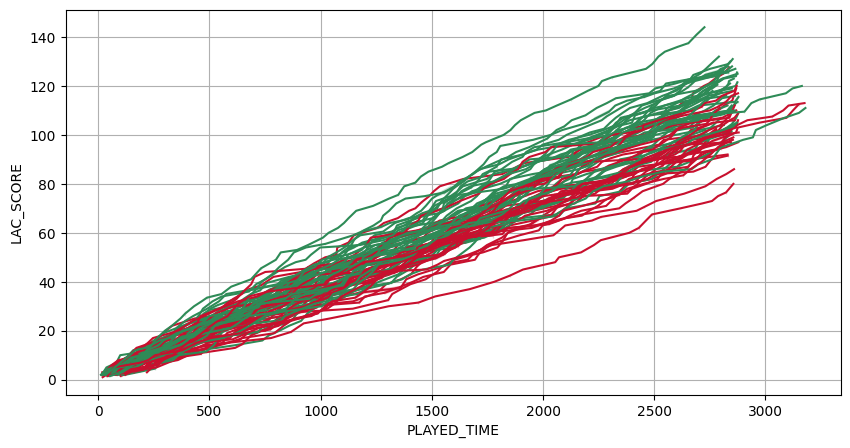

In [44]:
plt.figure(figsize=(10, 5))

game_colors = dict(zip(gamesData['GAME_ID'], gamesData['GAME_COLOR']))

sns.lineplot(playsData, x="PLAYED_TIME",y="LAC_SCORE",hue="GAME_ID", palette=game_colors,legend=False)
plt.grid(True)

In [45]:
def extractPlay(HOME,VISITOR): return VISITOR if pd.isna(HOME) else HOME

playsData['LAC_PLAYS'] = playsData.apply(lambda x: extractPlay(x['HOMEDESCRIPTION'] , x['VISITORDESCRIPTION']),axis=1)
playsData['SCOREMARGIN'] = playsData['SCOREMARGIN'].apply(lambda x: 0 if x=="TIE" else int(x))
HardenSM = playsData[playsData['LAC_PLAYS'].str.split(' ').apply(lambda x: x[0]=='Harden')]
LeonardSM = playsData[playsData['LAC_PLAYS'].str.split(' ').apply(lambda x: x[0]=='Leonard')]
PowellSM = playsData[playsData['LAC_PLAYS'].str.split(' ').apply(lambda x: x[0]=='Powell')]

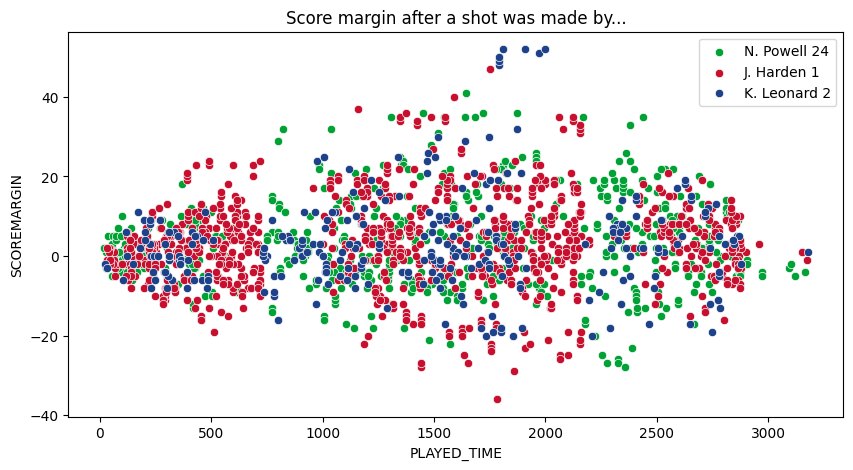

In [46]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=PowellSM,x="PLAYED_TIME",y="SCOREMARGIN",label="N. Powell 24",color="#00a135")
sns.scatterplot(data=HardenSM,x="PLAYED_TIME",y="SCOREMARGIN",label="J. Harden 1",color="#c8102E")
sns.scatterplot(data=LeonardSM,x="PLAYED_TIME",y="SCOREMARGIN",label="K. Leonard 2",color="#1d428a")
plt.title("Score margin after a shot was made by...")
plt.legend()

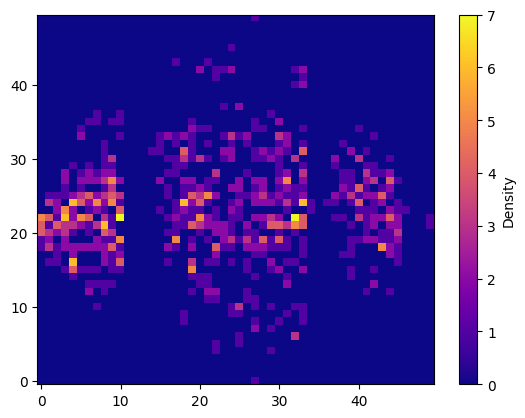

In [47]:
import numpy as np

heatmap, xedges,yedges = np.histogram2d(HardenSM["PLAYED_TIME"],HardenSM["SCOREMARGIN"], bins=50)
plt.imshow(heatmap.T, origin='lower',cmap='plasma',aspect='auto')
plt.colorbar(label='Density')